<a href="https://colab.research.google.com/github/ysu7120/ysu7120/blob/main/%EC%84%B8%EB%AF%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%95%99%EC%8A%B5%EB%AA%A8%EB%8D%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

#원본데이터

In [ ]:
# csv 파일을 데이터프레임으로 바꾸기 
# 인코딩 : UnicodeDecodeError가 발생하면 encoding을 바꿔볼것
# utf-8, euc-kr, cp949
# 파일을 인덱스로 지정
df = pd.read_csv("/content/drive/MyDrive/population/LOCAL_PEOPLE_DONG_201912.csv", encoding='utf-8')
df

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
20191201,0,11215710,45694.9988,452.3937,208.7971,1267.7678,5642.9235,5433.6801,2494.5993,1691.4831,...,2036.1446,1285.4200,794.6241,833.7179,772.1417,773.2152,827.1455,565.5378,1405.3707,NaN
20191201,0,11680545,37375.4506,1298.5585,731.2901,889.5126,895.5983,1397.2099,1609.7025,1825.4062,...,1503.9461,1752.1118,1591.0488,1555.4675,1033.6247,1094.5083,988.0638,944.5295,2710.1619,NaN
20191201,0,11680610,37266.9526,1083.2150,1559.2566,2339.8178,991.4434,990.1854,946.7321,1035.0291,...,888.9359,997.1139,1738.2101,2423.0246,1408.2536,1184.3355,1071.2366,858.9868,1878.8251,NaN
20191201,0,11680655,25231.2064,1191.0306,607.5946,639.2233,608.4116,697.5009,663.3373,919.4319,...,876.7431,1119.2400,1051.8991,1274.9860,852.3075,933.6367,949.1604,637.7794,1557.6550,NaN
20191201,0,11710570,40728.5564,1586.6273,818.9047,1204.9034,1172.2571,1195.7198,1163.9396,1472.8633,...,1321.7052,1625.5710,1434.9812,1861.6645,1766.8905,1991.8166,1977.4260,1332.3513,2779.2676,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191231,23,11740610,47108.0384,1530.5533,684.2480,1261.2936,1346.8427,1772.9466,1919.2425,2226.9075,...,1836.2225,1842.3955,1669.1141,1746.4848,1805.8380,2198.6277,1971.4508,1509.8941,3397.6009,NaN
20191231,23,11740685,56004.5812,1777.7481,859.6586,1252.0765,1500.0176,1999.8669,1869.7091,2371.1216,...,2173.7660,2183.6664,2088.3162,2559.8771,2309.2951,2736.9112,2354.2835,1820.0325,3858.1011,NaN
20191231,23,11740640,26471.4234,1150.2747,594.0026,731.9921,543.0908,682.9012,856.1581,1132.5655,...,926.6463,1231.7519,1213.1097,1152.5178,1060.8198,1234.5424,1112.0217,937.4364,1743.6741,NaN
20191231,23,11740650,27986.5462,1070.9042,371.4830,566.1300,747.7386,1173.3330,1189.2734,1283.0338,...,1167.0023,1150.3829,1146.3252,1050.6582,997.6744,1322.4171,1105.3542,965.8775,1934.5264,NaN


# 가장 총생활인구수가 많은 지역 찾기
#### 결과: 11월 1일 14시 기준 역삼1동(11680640)

In [ ]:
### 볼록 그래프 14시 max 제일 : 학교/회사
### 역삼1동 

# 해당날짜 11/01 , 14시
df_1101 = df[df.index == 20221101]
df_14 = df_1101[df_1101['기준일ID'] == 14]

## 총생활인구수 중 max
max_n = df_14['행정동코드'].max()

## 여기서 시간대구분 (행정동코드)가 가장 많은 총생활인구수를 갖는 행정동코드-
df_14[df_14['행정동코드']==max_n]

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수


####역삼1동의 한달간 24시간동안 총생활인구수 데이터
######해당 코드에서 "시간대구분"의 행정동코드변경시 장소 커스텀 가능

In [ ]:
###명동: 11140550	
###역삼1동: 11680640

df_s=df.loc[:, ["행정동코드"]]
df_s =df_s[df['시간대구분'] == 11140550]
df_s1= df_s[df_s.index == 20191201]
for i in range(2,32):
  new_df = df_s[df_s.index == 20191200+i]
  df_s1 = pd.concat([df_s1, new_df], ignore_index = True)
df_s1

,행정동코드
0,11501.2619
1,10655.2525
2,9992.1362
3,9599.3730
4,9638.0400
...,...
739,49184.2186
740,42450.0280
741,36648.7170
742,32166.3417


#### 특정 행정동의 시간별 총생활인구수 그래프로 보기


In [ ]:
df_s1['행정동코드'][12]

40857.5284

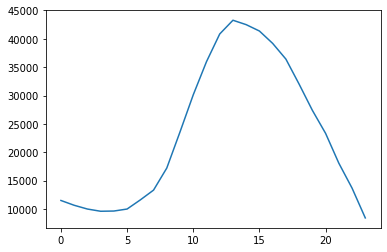

In [ ]:
## 특정 행정동의 시간별 총생활인구수 그래프로 보기
## 해당코드에서는 역삼1동
## 위 코드에서 df_s1데이터의 "시간대구분"의 행정동코드를 수정시 
# population : 시간별 총생활인구수
population = df_s1['행정동코드'][0:24]
population.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(population)

##모델에 입력시작

In [ ]:
df= df_s1
df

,행정동코드
0,11501.2619
1,10655.2525
2,9992.1362
3,9599.3730
4,9638.0400
...,...
739,49184.2186
740,42450.0280
741,36648.7170
742,32166.3417


###단일특성 데이터 정제함수

In [ ]:
def univeriate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
#### 학습값 지정 및 랜덤시드 선택
TRAIN_SPLIT = 696
tf.random.set_seed(13)

In [ ]:
###총인구수 데이터 저장
uni_data = df['행정동코드']
uni_data.index = df['행정동코드']
uni_data.head()

행정동코드
11501.2619    11501.2619
10655.2525    10655.2525
9992.1362      9992.1362
9599.3730      9599.3730
9638.0400      9638.0400
Name: 행정동코드, dtype: float64

In [ ]:
# 데이터 정규화
uni_data = uni_data.values

In [ ]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [ ]:
univariate_past_history = 24
univariate_future_target = 0

x_train_uni, y_train_uni = univeriate_data(uni_data, 0, TRAIN_SPLIT, 
                                           univariate_past_history, univariate_future_target)

x_val_uni, y_val_uni = univeriate_data(uni_data, TRAIN_SPLIT, None, 
                                       univariate_past_history, univariate_future_target)

In [ ]:
print('Single window of past history')
print(x_train_uni[0])
print('\n target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-1.02303952]
 [-1.04873064]
 [-1.06886777]
 [-1.08079498]
 [-1.07962076]
 [-1.06887624]
 [-1.01998584]
 [-0.96754756]
 [-0.84943677]
 [-0.65588073]
 [-0.45734354]
 [-0.27987172]
 [-0.13156547]
 [-0.05797228]
 [-0.08156768]
 [-0.11570196]
 [-0.18188327]
 [-0.26595718]
 [-0.40008588]
 [-0.54016375]
 [-0.66363117]
 [-0.82323074]
 [-0.95677977]
 [-1.11645785]]

 target temperature to predict
-1.13291802119291


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def baseline(history):
  return np.mean(history)

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i :
      plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
    else :
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

###BASELINE 모델 그래프

In [ ]:
#plot data값 지정
b=[x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])]
b

[array([[-1.02303952],
        [-1.04873064],
        [-1.06886777],
        [-1.08079498],
        [-1.07962076],
        [-1.06887624],
        [-1.01998584],
        [-0.96754756],
        [-0.84943677],
        [-0.65588073],
        [-0.45734354],
        [-0.27987172],
        [-0.13156547],
        [-0.05797228],
        [-0.08156768],
        [-0.11570196],
        [-0.18188327],
        [-0.26595718],
        [-0.40008588],
        [-0.54016375],
        [-0.66363117],
        [-0.82323074],
        [-0.95677977],
        [-1.11645785]]), -1.13291802119291, -0.6639580449008539]

-1.13291802119291
-0.6639580449008539


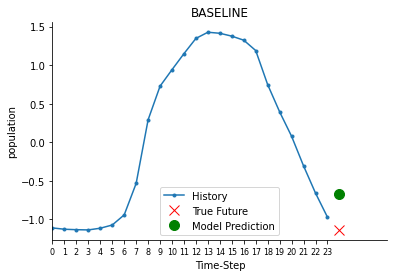

In [ ]:
#def show_plot(plot_data, delta, title):
#([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])]
labels = ['History', 'True Future', 'Model Prediction']
marker = ['.-', 'rx', 'go']
time_steps = create_time_steps(b[0].shape[0])
arr=[]

True_F = b[1]
Model_P = b[2]

if 0:
  future = 0
else:
  future = 0

plt.title("BASELINE")
for i, x in enumerate(b):
  if i == 1 :
    b[i]=uni_data[24]
    plt.plot(future, b[i], marker[i], markersize=10, label=labels[i])
    print(b[1])
  elif i == 2 :
    b[i]=(Model_P * b[1]) / True_F
    plt.plot(future, b[i], marker[i], markersize=10, label=labels[i])
    print(b[2])
  else :
    for j in range(TRAIN_SPLIT,TRAIN_SPLIT+24):
      arr.append(uni_data[j])
    for k in range(0,24):
      b[0][k]=arr[k]
    plt.plot(time_steps, b[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.axis('auto')
  plt.xlim([time_steps[0], (future+2)*2])
  TIME=time_steps
  values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] 
  plt.xticks(TIME,values,fontsize=8)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.ylabel('population')
  plt.xlabel('Time-Step')

#LSTM 모델제작

In [ ]:
train_univariate=tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE=10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(9, input_shape = x_train_uni.shape[-2:]), tf.keras.layers.Dense(1)
])
simple_lstm_model.summary()
simple_lstm_model.compile(optimizer='adam', loss='mae')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9)                 396       
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for x, y in val_univariate.take(1):
  print(simple_lstm_model.predict(x).shape)

1/1 [==============================] - 4s 4s/step
(24, 1)


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

f1=simple_lstm_model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 9s 15ms/step - loss: 0.5473 - val_loss: 0.1697
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.1090 - val_loss: 0.0960
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0808 - val_loss: 0.0880
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0705 - val_loss: 0.0843
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0647 - val_loss: 0.0814
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0613 - val_loss: 0.0846
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0583 - val_loss: 0.0803
Epoch 8/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0558 - val_loss: 0.0846
Epoch 9/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0537 - val_loss: 0.0824
Epoch 10/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0518 - val_loss: 0.082

In [ ]:
from keras.layers import RNN
model = Sequential()
model.add(Dense(9, activation = 'relu', input_shape = x_train_uni.shape[-2:]))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mae')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24, 9)             18        
                                                                 
 dense_2 (Dense)             (None, 24, 1)             10        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

f2=model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.9045 - val_loss: 0.8003
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8981 - val_loss: 0.8009
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8001
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8979 - val_loss: 0.8007
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8007
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8980 - val_loss: 0.8009
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8020
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8982 - val_loss: 0.8012
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8010
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8017

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.SimpleRNN(units=9,return_sequences=False,
                                                    input_shape = x_train_uni.shape[-2:]),
                                                    tf.keras.layers.Dense(1)])
model2.compile(optimizer='adam', loss='mse')
f3 = model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch = EVALUATION_INTERVAL,
                      validation_data = val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8980 - val_loss: 0.8014
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8976 - val_loss: 0.8011
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8978 - val_loss: 0.8008
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8014
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8009
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8979 - val_loss: 0.8015
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8977 - val_loss: 0.8015
Epoch 8/10
185/200 [==========================>...] - ETA: 0s - loss: 0.8980

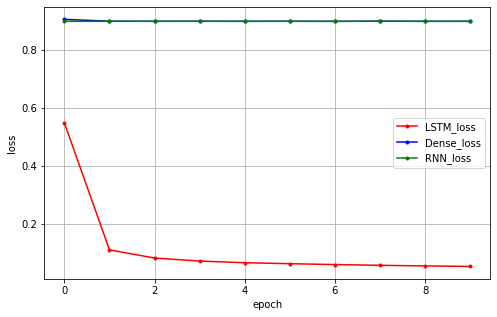

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
lstm= f1.history['loss']
dense = f2.history['loss']
rnn = f3.history['loss']

x_len = np.arange(len(rnn))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, lstm, marker='.', c="red", label='LSTM_loss')
plt.plot(x_len, dense, marker='.', c="blue", label='Dense_loss')
plt.plot(x_len, rnn, marker='.', c="green", label='RNN_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

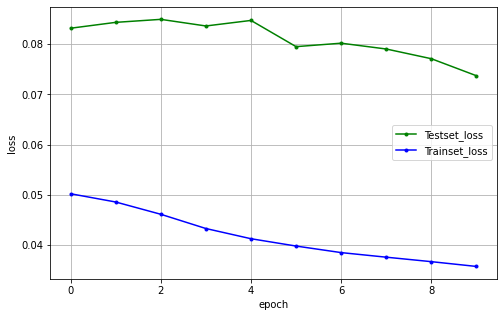

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
y_vloss = f1.history['val_loss']
y_loss = f1.history['loss']

x_len = np.arange(len(y_loss))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, y_vloss, marker='.', c="green", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 16ms/step


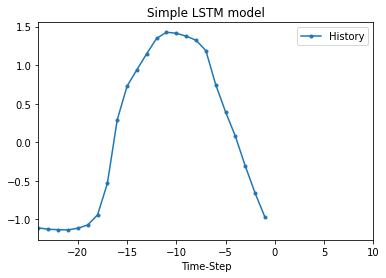

1/1 [==============================] - 0s 17ms/step


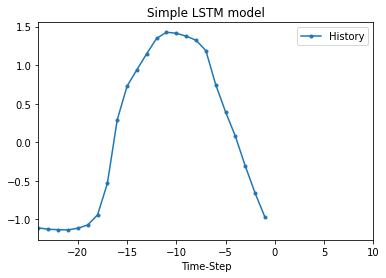

1/1 [==============================] - 0s 17ms/step


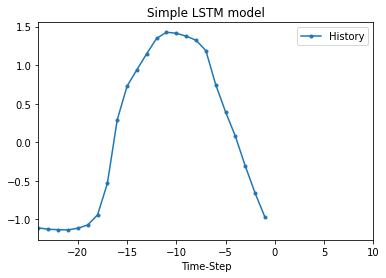

In [ ]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [ ]:
a = simple_lstm_model.predict(x)
a = [x[0].numpy(), y[0].numpy(), a[0]]
a

1/1 [==============================] - 0s 16ms/step


[array([[-1.10903319],
        [-1.12631405],
        [-1.13213283],
        [-1.13507936],
        [-1.11305933],
        [-1.07152313],
        [-0.94051988],
        [-0.53249717],
        [ 0.29192674],
        [ 0.72799379],
        [ 0.94170088],
        [ 1.14954841],
        [ 1.34694357],
        [ 1.42659816],
        [ 1.41328715],
        [ 1.37589369],
        [ 1.32364282],
        [ 1.18932442],
        [ 0.74757643],
        [ 0.39504801],
        [ 0.07808273],
        [-0.30523194],
        [-0.65765474],
        [-0.96997834]]),
 -1.0361066556285108,
 array([-1.0296959], dtype=float32)]

In [ ]:
uni_data = df['행정동코드']
uni_data.index = df['행정동코드']
uni_data.head()

행정동코드
11501.2619    11501.2619
10655.2525    10655.2525
9992.1362      9992.1362
9599.3730      9599.3730
9638.0400      9638.0400
Name: 행정동코드, dtype: float64

In [ ]:
uni_data = uni_data.values


In [ ]:
#2022/12/25일 24시간 데이터
uni_data[697] = 13000
uni_data[698] = 7250
uni_data[699] = 6250
uni_data[700] = 5250
uni_data[701] = 4750
uni_data[702] = 5250
uni_data[703] = 5750
uni_data[704] = 7250
uni_data[705] = 8750
uni_data[706] = 13000
uni_data[707] = 19000
uni_data[708] = 25000
uni_data[709] = 33000
uni_data[710] = 39000
uni_data[711] = 47000
uni_data[712] = 55000
uni_data[713] = 61000
uni_data[714] = 69000
uni_data[715] = 79000
uni_data[716] = 71000
uni_data[717] = 57000
uni_data[718] = 43000
uni_data[719] = 29000
uni_data[720] = 13000

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

61000.0
[60622.566]


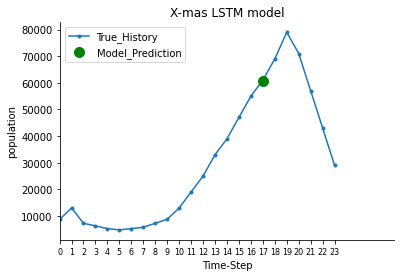

In [ ]:
#def show_plot(plot_data, delta, title):
labels = ['True_History', 'True Future', 'Model_Prediction']
marker = ['.-', 'rx', 'go']
time_steps = create_time_steps(a[0].shape[0])
arr=[]

True_F = a[1]
Model_P = a[2]

if 0:
    future = 0
else:
  future = 0

plt.title("X-mas LSTM model")
for i, x in enumerate(a):
  if i == 1 :
    a[i]=uni_data[TRAIN_SPLIT+17]
    #plt.plot(-3, a[i], marker[i], markersize=10, label=labels[i])
    print(a[1])
  elif i == 2 :
    a[i]=(Model_P * a[1]) / True_F
    plt.plot(-7, a[i], marker[i], markersize=10, label=labels[i])
    print(a[2])
  else :
    for j in range(TRAIN_SPLIT,TRAIN_SPLIT+24):
      arr.append(uni_data[j])
    for k in range(0,24):
      a[0][k]=arr[k]
    plt.plot(time_steps , a[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.axis('auto')
  plt.xlim([time_steps[0], (future+2)*2])
  TIME=time_steps
  values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] 
  plt.xticks(TIME,values,fontsize=8)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.ylabel('population')
  plt.xlabel('Time-Step')

###카카오 메시지 API 나에게 보내기

In [ ]:
predict_data=a[2][0]
print(predict_data)

60622.566


In [ ]:
uni_data[:552].mean()

45575.742263043474

In [ ]:
avg = uni_data[:552].mean()
avg // 2

22787.0

In [ ]:
###서울시 실시간 데이터의 인구 밀집구분 참조
avg = uni_data[:552].mean()
predict_data=a[2][0]
population=0

if predict_data <= (avg // 2):
  population= "여유"
elif predict_data > (avg // 2) and predict_data <= (avg // 1.33):
  population= "보통"
elif predict_data <= (avg // 1.33) and predict_data == avg :
  population= "약간 붐빔"
else:
  population= "붐빔"

print(population)

붐빔


In [ ]:
#text= f'현재 명동의 인구밀집위험도는{population}입니다’
print(f'현재 명동의 인구밀집위험도는 {population}입니다.')

현재 명동의 인구밀집위험도는 붐빔입니다.


In [ ]:
import requests
import json

url = 'https://kauth.kakao.com/oauth/token'
client_id = 'dd7dd2158951bab32da285b6d47e0cf0'
redirect_uri = 'https://example.com/oauth'
code = 'IYVVME9Xh2LwPh5UHSebIWX1pE58Pj_Leh4CCjWgT-WTadyIyfRZZPVUDB8xKdsXmDBNjAo9dNkAAAGFTWgizg'

data = {
    'grant_type':'authorization_code',
    'client_id':client_id,
    'redirect_uri':redirect_uri,
    'code': code,
    }

response = requests.post(url, data=data)
tokens = response.json()

#발행된 토큰 저장
with open("/content/drive/MyDrive/population/token.json","w") as kakao:
    json.dump(tokens, kakao)

In [ ]:
text= '현재 명동의 인구밀집위험도는 보통입니다'

In [ ]:
import requests
import json

#발행한 토큰 불러오기
with open("/content/drive/MyDrive/population/token.json","r") as kakao:
    tokens = json.load(kakao)

url="https://kapi.kakao.com/v2/api/talk/memo/default/send"

headers={
    "Authorization" : "Bearer " + tokens["access_token"]
}

data = {
       'object_type': 'text',
       'text': f'현재 명동의 인구밀집위험도는 {population}입니다.',
       'link': {
           'web_url': 'https://developers.kakao.com',
           'mobile_web_url': 'https://developers.kakao.com'
       },
       'button_title': '키워드'
   }
   
data = {'template_object': json.dumps(data)}
response = requests.post(url, headers=headers, data=data)
response.status_code

200